In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

[[2 2 2 2]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [3 3 3 3]]


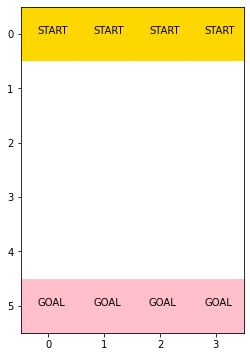

In [ ]:
#MAP_WIDTH = 4
#MAP_HEIGHT =6

MAP_WIDTH = 4
MAP_HEIGHT = 6



MAP_COLOR = [
    'white',# 0: Road 通過可能、報酬なし
    'black',# 1: Wall 通ることができない
    'gold' ,# 2: Goal 着いたら報酬を得て終了
    'pink',
    'blue'
]

MAP=np.zeros((MAP_HEIGHT,MAP_WIDTH),dtype = int)
MAP=np.array(MAP)
MAP[0]=2
MAP[MAP_HEIGHT-1]=3

print(MAP)

# MAPの定義
#MAP = np.array([
                #[2,2,2],
                #[0,0,0],
                #[3,3,3]
                #])


# マップの表示設定
fig = plt.figure(figsize=(MAP_WIDTH,MAP_HEIGHT))
ax = plt.gca()
plt.xlim(-0.5,MAP_WIDTH-0.5)
plt.ylim(MAP_HEIGHT-0.5,-0.5)
for i in range(MAP_HEIGHT):
    for j in range(MAP_WIDTH):
      plt.plot(j,i, marker='s', color = MAP_COLOR[MAP[i][j]], markersize=55)
      if(MAP[i][j]==2):
          plt.text(j-0.2,i,'START')
      if(MAP[i][j]==3):
        plt.text(j-0.2,i,'GOAL')
#img=plt.plot([1.5,1.5],[5.5,6.5],color='blue',linewidth=2)

In [ ]:
#Player = [2,4] #エージェントのスタート位置

Player = [1,MAP_HEIGHT-2]

enemy = [ ]

enemy_s=0

MA_STATE_NUM=MAP_HEIGHT*MAP_WIDTH


#episode=50

r_e=0

# 状態と位置に関する関数

#エージェント関連
# エージェントの位置からサブ状態番号に変換
def pos_to_substate(pos):
    return MAP_HEIGHT*pos[0]+pos[1]

# エージェントのサブ状態番号から位置を抽出
def agent_substate_to_pos(sa):
    return [sa//MAP_HEIGHT,sa%MAP_HEIGHT]

# 総合状態番号関連
# 各サブ状態番号から状態番号を計算
def substates_to_state(sa, sma):
    #print(sa)
    #print(sma)
    return sa*MA_STATE_NUM+sma

# 状態番号から各サブ状態番号を抽出
def state_to_substates(s):
    #return [s//(MA_STATE_NUM),s//(MA_STATE_NUM)%(MA_STATE_NUM)]
    return [s//(MA_STATE_NUM),s%(MA_STATE_NUM)]



In [ ]:
# 位置から状態番号に変換
def pos_to_state(pos):
    return MAP_HEIGHT*pos[0]+pos[1]

# 状態番号から位置を抽出
def state_to_pos(state):
    return [state//MAP_HEIGHT,state%MAP_HEIGHT]



#Player = [MAP_HEIGHT-1,MAP_WIDTH/2] #エージェントのスタート位置



for i in range(MAP_HEIGHT):
    r_wx = random.randint(0,MAP_HEIGHT-1)
    enemy.append([r_wx,0])#敵のスタート位置

print("enemy action!")

enemy2 =[]
enemy3 =[]

#e_pos=np.array([[0,0],[1,0],[2,0],[3,0]])

#e_pos=np.array([[0,0],[1,0]])
e_pos=[]

for i in range(MAP_WIDTH):
  e_pos.append([i,0])

print(e_pos)

for i in enemy:
  print(i)
  enemy3.append(i)
  enemy2.append(pos_to_state(i))



enemy action!
[[0, 0], [1, 0], [2, 0], [3, 0]]
[4, 0]
[5, 0]
[3, 0]
[4, 0]
[3, 0]
[2, 0]


In [ ]:
def is_movable(pos):
    x = pos[0]
    y = pos[1]
    if x < 0 or x > MAP_WIDTH - 1:
        return False
    if y < 0 or y > MAP_HEIGHT - 1:
        return False

    if MAP[y][x] == 1:
        return False

    return True

  # 座標 pos = [x, y] がホールか判定する関数
def is_goal(pos):
    x = pos[0]
    y = pos[1]

    #print(x)
    #print(y)
    
    if MAP[y][x]==3:
        print("goal!")
        
        return True
    else:
      return False

def clash_enemy(s,e):
  #print(s)
  #print(e)
  #[x, y] = state_to_pos(s)
  [sa, sma] = state_to_substates(s)
  user=agent_substate_to_pos(sa)
  x=user[0]
  y=user[1]
  #[e_x,e_y] =state_to_pos(e)
  [e_x,e_y] = state_to_pos(sma)

  #print(e_x)
  #s=pos_to_state(Player)

  if x == e_x and y == e_y:
    return True
  else:
    return False

# 状態と行動に関する関数


# epsilon-greedy法による行動選択
def get_action(s, Q, epsilon):
    num_actions = Q.shape[1]
    if np.random.rand() < epsilon:
        a_next = np.random.choice(range(num_actions))
    else:
        a_next = np.argmax(Q[s,:])
        #print(a_next)
    return a_next

# 次の状態の決定
def get_s_next(s, a,sma_next):
    [sa, sma] = state_to_substates(s)
    user=agent_substate_to_pos(sa)
    x=user[0]
    y=user[1]
   # r = random.randint(1,10)

  
    #print("take")
    print("a:"+str(a))
    if a == 0: #left
      x = x - 1
    elif a == 1: #right
      x = x + 1
    #elif a == 3: #right
        #y=y+1
    #elif a == 4:
      #y=y-1

    if is_movable([x, y]): #移動可能な場合のみ移動
        #print("agent"+str([x,y]))
        #print(pos_to_substate([x, y]))
      return substates_to_state(pos_to_substate([x, y]),sma_next)
        #return pos_to_state([x, y])
    else:
      return substates_to_state(pos_to_substate([user[0], user[1]]),sma_next)


e_snum=0

  # モンスターAの次の状態の決定
def get_sma_next(sa,sma,STEP):

  global e_snum

  [sx,sy]=agent_substate_to_pos(sa)
  [x,y]=agent_substate_to_pos(sma)
  Y=y+1
  X=x
  #print("count"+str(e_pos[STEP]))
  #X=e_pos[STEP][0]
  #print(str(STEP)+":"+str([X,Y]))

  if sx==x and sy==y:
    #e_snum=e_snum+1
    #if e_snum>=MAP_WIDTH:
      #e_snum=0
    e_snum=np.random.choice(MAP_WIDTH)
    #return pos_to_substate(e_pos[r])
    return [pos_to_substate(e_pos[e_snum]),"A"]

  if Y>=MAP_HEIGHT:
    #e_snum=e_snum+1
    #if e_snum>=MAP_WIDTH:
      #e_snum=0
    e_snum=np.random.choice(MAP_WIDTH)
    #return pos_to_substate(e_pos[e_snum])
    return [pos_to_substate(e_pos[e_snum]),"B"]
  else:
    #return pos_to_substate([X,Y])
    return [pos_to_substate([X,Y]),"C"]



In [ ]:
# Q学習関連の関数

e_list=[]

# Q学習本体
def Q_learning(s, a, r, s_next, Q, eta):
    [sa,sma]=state_to_substates(s)
    [sa1,sma1] = state_to_substates(s_next)
    GAMMA = 0.9
    #if is_goal(agent_substate_to_pos(sma)):
    #if clash_enemy(sa,sma) or is_goal(agent_substate_to_pos(sma)):
    #if clash_enemy(sa,sma) or clash_enemy(sa1,sma1):
    if clash_enemy(sa1,sma1):
        Q[s,a] = Q[s,a] + eta * (r - Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta * (r + GAMMA * np.max(Q[s_next,:]) - Q[s,a])
    return Q

# スタートからゴールまでのQ学習
def Q_learning_one_episode(Q, epsilon,eta):
  #初期位置等の設定
  #print(enemy2)
  e_snum=np.random.choice(MAP_WIDTH)
  s = substates_to_state(pos_to_substate(Player),pos_to_substate(e_pos[e_snum]))
  print("S:"+str(s))
  #s = pos_to_state(Player)
  a_next = get_action(s, Q, epsilon)
  history = [[s, np.nan]]

  #sma = enemy2[0]
  sma=pos_to_substate(e_pos[e_snum])

  r=0
  e_count=0

  flag = False

    #episode=50

  count=-1

  #最大50ステップの学習
  #for step in range(50):
  for step in range(100):
    r=0
    #for step in range(MAP_WIDTH*MAP_HEIGHT):
    #for et in enemy2:
    #今回の行動による状態遷移とその記録
    a = a_next
    #if (step%MAP_HEIGHT==0):
      #print("step"+str(step))
      #count=step//MAP_HEIGHT
      #print(count)
    history[-1][1] = a
    [sa1, sma1]= state_to_substates(s) 
    #print(a)
    #print("sa:"+str(sa)+"sma:"+str(sma))
    #sa_next = get_s_next(s,a)

    sma_next = get_sma_next(sa1,sma1,count)
    s_next = get_s_next(s,a,sma_next[0])

    #if clash_enemy(s,sma_next) == True:
    #if clash_enemy(s_next,sma_next[0]) == True and sma_next[1] == "C":
      #print("CLASH!")
      #r=1
      #sma_next = get_sma_next(s,sma_next[0],count)
      #s_next = get_s_next(s,a,sma_next[0])


    if sma_next[1] == "A":
      print("clash!!")
      r=1
      #e_snum=np.random.choice(MAP_WIDTH)
      #sma_next=pos_to_substate(e_pos[e_snum])
      #s1 = substates_to_state(sa,sma_next)
      #s_next = get_s_next(s1,a,sma_next)


    #s_next = get_s_next(s,a,sma_next)
    #history.append([s_next, np.nan])


    #if is_goal(agent_substate_to_pos(sma_next)):
    #if sma_next[1] == "B" or sma_next[1] == "C":
    if sma_next[1] == "B":
      e_count=e_count+1
      r=-1
        #r=0
      #print(agent_substate_to_pos(sma_next))

    #if sma_next[1] == "C":
      #r=0
      #if r==-1:
        #r=0
      #else:
        #r=r
    

    history.append([s_next, np.nan])
    Q = Q_learning(s, a, r, s_next, Q, eta)
    print("r"+str(r))
    a_next = get_action(s_next, Q, epsilon)
    s = s_next
    #sma=sma_next[0]


    #今回のステップでのQ学習を実行

    #Q = Q_learning(s, a, r, s_next, Q, eta)
    #print("r"+str(r))


  print(history)    
  return [history, Q, e_count]

In [ ]:
# Q学習を実行

MAX_EPISODE =  1000 #最大学習エピソード回数
num_states = MAP_HEIGHT*MAP_WIDTH*MAP_HEIGHT*MAP_WIDTH#状態最大数（エージェントの迷路での位置）
num_actions = 3 #左右の行動
Qtable = np.random.rand(num_states,num_actions) #Q関数のランダムな初期化

for episode in range(MAX_EPISODE):
    epsilon = 0.5 / (episode + 1) #乱数行動の選択確率、徐々に減少
    eta = 0.1 #学習のステップ幅

    [history, Qtable, e_list] = Q_learning_one_episode(Qtable,epsilon,eta)
    print("number of steps:" + str(len(history)-1))

ストリーミング出力は最後の 5000 行に切り捨てられました。
r0
a:2
r0
a:1
clash!!
r1
a:2
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:2
r0
a:2
r0
a:0
r0
a:1
r0
a:0
clash!!
r1
a:0
r0
a:1
r0
a:0
r0
a:2
r0
a:1
clash!!
r1
a:0
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:2
r0
a:1
r0
a:2
r0
a:0
r0
a:2
clash!!
r1
a:0
r0
a:1
r0
a:0
r0
a:2
r0
a:1
clash!!
r1
a:2
r0
a:1
r0
a:2
r0
a:0
r0
a:2
clash!!
r1
a:2
r0
a:1
r0
a:2
r0
a:0
r0
a:2
clash!!
r1
[[258, 2], [259, 2], [260, 1], [405, 1], [550, 0], [396, 2], [397, 2], [398, 0], [255, 1], [400, 0], [240, 0], [97, 1], [242, 0], [99, 2], [100, 1], [246, 2], [247, 1], [392, 2], [393, 0], [250, 2], [252, 0], [109, 2], [110, 1], [255, 1], [400, 0], [246, 2], [247, 1], [392, 2], [393, 0], [250, 2], [246, 2], [247, 1], [392, 2], [393, 0], [250, 2], [240, 0], [97, 1], [242, 0], [99, 2], [100, 1], [246, 2], [247, 1], [392, 2], [393, 0], [250, 2], [240, 0], [97, 1], [242, 0], [99, 2], [100, 1], [252, 0], [109, 2], [110, 1], [255, 1], [400, 0], [240, 0], [97, 1], [242, 0], [99, 2], [100, 1], [258, 

In [ ]:
##最終結果のアニメーションの表示
from matplotlib import animation
from IPython.display import HTML


def init():
    line.set_data([], [])
    e_line.set_data([], [])
    return(line,e_line,)


def animate(i):
    global count
    #[e_x,e_y]=enemy3[0]
    #print(history[i])
    state = history[i][0]
    print(state)
    [S1,em]=state_to_substates(state)
    [x, y] = agent_substate_to_pos(S1)
    [e1,e2]=agent_substate_to_pos(em)
    e_line.set_data(e1,e2)
    line.set_data(x, y)
    #e_line.set_data(e1,e2)
    #if  (i<MAP_HEIGHT*MAP_WIDTH):
      #if (i%MAP_HEIGHT)!=0:
        #e_y=i%MAP_HEIGHT
        #e_x=e_pos[i//MAP_HEIGHT][0]
      #else:
        #e_y=0
        #e_x=e_pos[i//MAP_HEIGHT][0]
      #e_line.set_data(e_x,e_y)
    #e_line.set_data(e1,e2)
      #[e_y,e_x] =enemy3[i]
      #e_line.set_data(e_x,e_y)
    #e_state = e_history[i][0]
    #[e_x,e_y] =state_to_pos(e_state)
    #e_line.set_data(e_x,e_y)
    #if (r_list[i-1]<=r_d):
      #img=ax.plot([1.5,1.5],[5.5,6.5],color='blue',linewidth=2)
    #else:
      #img=ax.plot([1.5,1.5],[5.5,6.5],color='red',linewidth=2)

    return(line,)

#最終経路の再計算
[history, final_Qtable, e_count] = Q_learning_one_episode(Qtable,0,0)


#アニメーション作成
line, = ax.plot([], [], marker='o', color='green', markersize=40)
e_line, = ax.plot([], [], marker='o', color='blue', markersize=20)
#img=ax.plot([1.5,1.5],[5.5,6.5],color='blue',linewidth=2)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=300, repeat=False)
HTML(anim.to_jshtml())

S:246
a:2
r0
a:1
r0
a:2
r0
a:0
r0
a:2
clash!!
r1
a:2
r0
a:1
r0
a:2
r0
a:0
r0
a:2
clash!!
r1
a:0
r0
a:1
r0
a:0
r0
a:2
r0
a:1
clash!!
r1
a:2
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:0
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:2
r0
a:2
r0
a:0
r0
a:1
r0
a:0
clash!!
r1
a:0
r0
a:1
r0
a:0
r0
a:2
r0
a:1
clash!!
r1
a:2
r0
a:1
r0
a:2
r0
a:0
r0
a:2
clash!!
r1
a:0
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:2
r0
a:1
r0
a:2
r0
a:0
r0
a:2
clash!!
r1
a:0
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:2
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:2
r0
a:0
r0
a:0
r0
a:2
r0
a:1
clash!!
r1
a:2
r0
a:1
r0
a:2
r0
a:0
r0
a:2
clash!!
r1
a:0
r0
a:1
r0
a:0
r0
a:2
r0
a:1
clash!!
r1
a:0
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:2
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:2
r0
a:2
r0
a:0
r0
a:1
r0
a:0
clash!!
r1
a:0
r0
a:2
r0
a:1
r0
a:1
r0
a:0
clash!!
r1
a:2
r0
a:1
r0
a:2
r0
a:0
r0
a:2
clash!!
r1
[[246, 2], [247, 1], [392, 2], [393, 0], [250, 2], [246, 2], [247, 1], [392, 2], [393, 0], [250, 2], [240, 0], [97, 1], [242, 0], [99,

In [ ]:
# アニメーション作成と表示
anim.save('movie_defense1.mp4')
from google.colab import files
files.download('movie_defense1.mp4')

246
247
392
393
250
246
247
392
393
250
240
97
242
99
100
258
259
260
405
550
402
259
260
405
550
396
397
398
255
400
240
97
242
99
100
246
247
392
393
250
252
109
110
255
400
246
247
392
393
250
252
109
110
255
400
258
259
260
405
550
384
385
242
99
100
246
247
392
393
250
240
97
242
99
100
252
109
110
255
400
258
259
260
405
550
396
397
398
255
400
252
109
110
255
400
246
247
392
393
250
246


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ストリーミング出力は最後の 5000 行に切り捨てられました。
a:2
r0
a:2
clash!!
r1
a:2
r0
a:0
r0
a:0
r0
a:2
r0
a:2
clash!!
r1
a:2
r0
a:1
r0
a:1
r0
a:2
r0
a:0
clash!!
r1
a:0
r0
a:1
r0
a:1
r0
a:0
r0
a:2
clash!!
r1
a:0
r0
a:1
r0
a:1
r0
a:2
r0
a:0
clash!!
r1
a:0
r0
a:0
r0
a:0
r0
a:2
r0
a:2
clash!!
r1
a:2
r0
a:0
r0
a:0
r0
a:2
r0
a:2
clash!!
r1
a:1
r0
a:0
r0
a:2
r0
a:1
r0
a:2
clash!!
r1
a:0
r0
a:0
r0
a:0
r0
a:2
r0
a:2
clash!!
r1
a:2
r0
a:0
r0
a:0
r0
a:2
r0
a:2
clash!!
r1
a:2
r0
a:0
r0
a:0
r0
a:2
r0
a:2
clash!!
r1
[[246, 0], [103, 1], [248, 1], [393, 0], [250, 2], [252, 0], [109, 1], [254, 1], [399, 2], [400, 0], [252, 0], [109, 1], [254, 1], [399, 2], [400, 0], [246, 0], [103, 1], [248, 1], [393, 0], [250, 2], [240, 0], [97, 0], [98, 0], [99, 2], [100, 2], [102, 1], [247, 0], [104, 2], [105, 1], [250, 2], [252, 0], [109, 1], [254, 1], [399, 2], [400, 0], [240, 0], [97, 0], [98, 0], [99, 2], [100, 2], [96, 2], [97, 0], [98, 0], [99, 2], [100, 2], [96, 2], [97, 0], [98, 0], [99, 2], [100, 2], [96, 2], [97, 0], [98, 0], [9

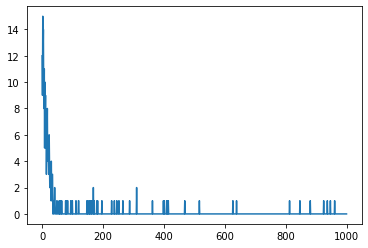

In [ ]:
# Qで解く学習状況を100試行分記録して平均する# 最大値、最小値も計算し、グラフで図示する 

S=1


EL1=e_list

#MAX_EPISODE =  1000 #最大学習エピソード回数

EL = np.zeros([S,MAX_EPISODE])
num_states = MAP_HEIGHT*MAP_WIDTH*MAP_HEIGHT*MAP_WIDTH#状態最大数（エージェントの迷路での位置）
num_actions = 3 #左右の行動
Qtable = np.random.rand(num_states,num_actions) #Q関数のランダムな初期化

for episode1 in range(S):
  for episode2 in range(MAX_EPISODE):
    epsilon = 0.5 / (episode2+ 1) #乱数行動の選択確率、徐々に減少
    eta = 0.1 #学習のステップ幅
    [history, Qtable, e_count] = Q_learning_one_episode(Qtable,epsilon,eta)
    EL[episode1][episode2]=e_count

Ep=[]

for p in range(MAX_EPISODE):
  Ep.append(p)

plt.plot(Ep,EL[0])

#for i in range(S):
  #plt.plot(Ep,EL[i])


#print(np.mean(EL,axis=0))
#print(np.max(EL,axis=0)) 
#print(np.min(EL,axis=0)) 
#plt.plot(range(MAX_EPISODE),np.mean(EL,axis=0),label="mean") 
#plt.plot(range(MAX_EPISODE),np.max(EL,axis=0),label="max") 
#plt.plot(range(MAX_EPISODE),np.min(EL,axis=0),label="min") 